# Exercise 2: Enhancing feature learning for Deep Neural Network & Intro to CNN

In [1]:
# Step 1: Apply image processing on the CIFAR10 image dataset
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


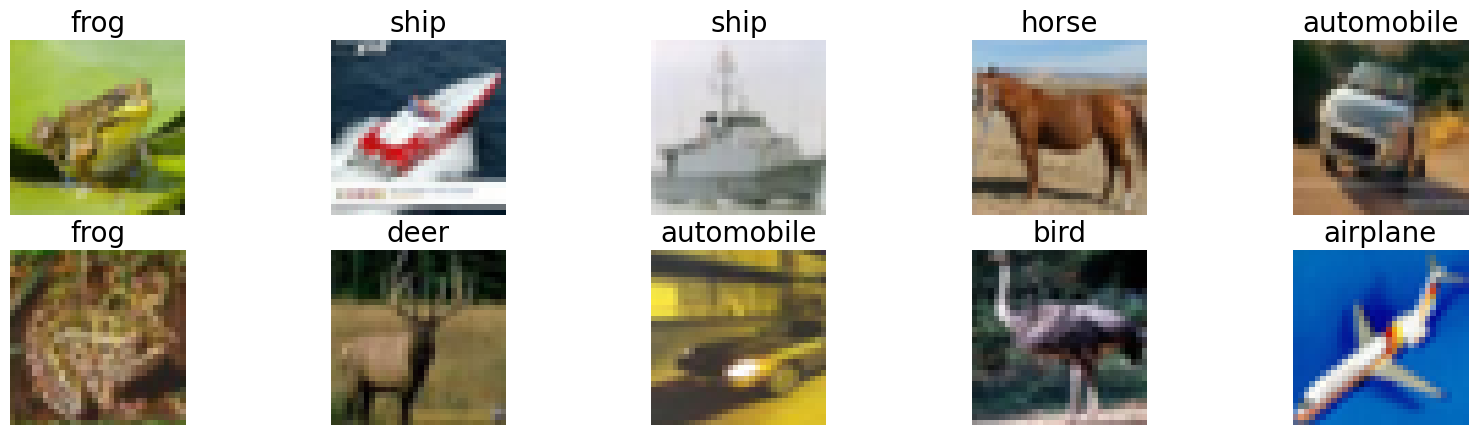

In [2]:
# Step 2: Image visualization using matplotlib
fig = plt.figure(figsize=(20, 5))
for ii in range(10):
   # sample a random image from X_train
   image_indx = np.random.choice(range(len(X_train)))
   image_random = X_train[image_indx]
   image_title = labels_map[y_train[image_indx][-1]]

   # put image into subplots
   imgplot = fig.add_subplot(2,5,ii+1)
   imgplot.imshow(image_random)
   imgplot.set_title(image_title, fontsize=20)
   imgplot.axis('off')

In [3]:
# Step 3.1: sample a random image
image_index = np.random.choice(range(len(X_train)))
image_example = X_train[image_index]

In [4]:
# Step 3.2:  Use the Python Imaging Library 'PIL' to save image into local file
import PIL
img = PIL.Image.fromarray(X_train[image_index])
img.save('image.jpg')

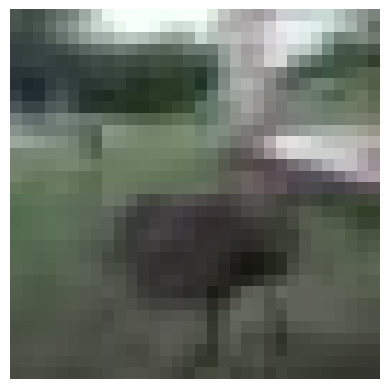

In [5]:
# Step 3.3:  reload image into python
import matplotlib.pyplot as plt
data = plt.imread('image.jpg') # read the local image
plt.imshow(data)
plt.axis('off')
plt.show()

In [6]:
## Step 4.1: Load the dataset, and get training, validation and test set
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_data, y_data), (X_test, y_test) = cifar10.load_data()

In [7]:
## Step 4.2: Set up training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_data,y_data, test_size=0.2, random_state=42)

In [8]:
print("Training data shape", X_train.shape)
print("Validation data shape", X_val.shape)
print("Testing data shape", X_test.shape)
print("y_train data shape", y_train.shape)
print("y_val data shape", y_val.shape)
print("y_test data shape", y_test.shape)
print("y_train: ",y_train)

Training data shape (40000, 32, 32, 3)
Validation data shape (10000, 32, 32, 3)
Testing data shape (10000, 32, 32, 3)
y_train data shape (40000, 1)
y_val data shape (10000, 1)
y_test data shape (10000, 1)
y_train:  [[6]
 [2]
 [5]
 ...
 [8]
 [8]
 [8]]


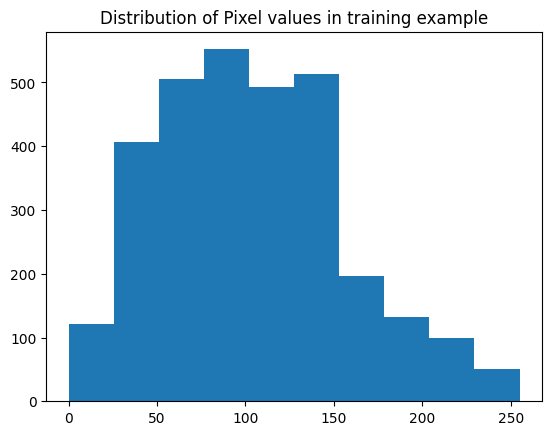

In [9]:
## Step 4.2: Plot the histogram for the pixels in each image
from matplotlib import pyplot as plt
plt.hist(X_data[0].flatten(),)
plt.title("Distribution of Pixel values in training example")
plt.show()

In [10]:
# Step 5.1: Load the dataset
N_train = X_train.shape[0] # the first dimension of the tensor is number of total images
D_train = 32*32*3 # the remaining dimensions of the tensor is the shape of image, you can also use X_data.shape[1]*X_data.shape[2]*X_data.shape[3]
X_train_flatten = X_train.reshape(N_train, D_train)
X_train_flatten = X_train_flatten.astype('float32')


N_val = X_val.shape[0]
D_val = 32*32*3
X_val_flatten = X_val.reshape(N_val,D_val)
X_val_flatten = X_val_flatten.astype('float32')

N_test = X_test.shape[0]
D_test = 32*32*3
X_test_flatten = X_test.reshape(N_test,D_test)
X_test_flatten = X_test_flatten.astype('float32')

print("Training data shape", X_train_flatten.shape)
print("Validation data shape", X_val_flatten.shape)
print("Testing data shape", X_test_flatten.shape)

Training data shape (40000, 3072)
Validation data shape (10000, 3072)
Testing data shape (10000, 3072)


In [11]:
# Step 5.2: Scale the pixels into range (0,1) using Min-Max normalization (you can also try other image normalization techniques)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flatten.astype(np.float32))
X_val_scaled = scaler.transform(X_val_flatten.astype(np.float32))
X_test_scaled = scaler.transform(X_test_flatten.astype(np.float32))

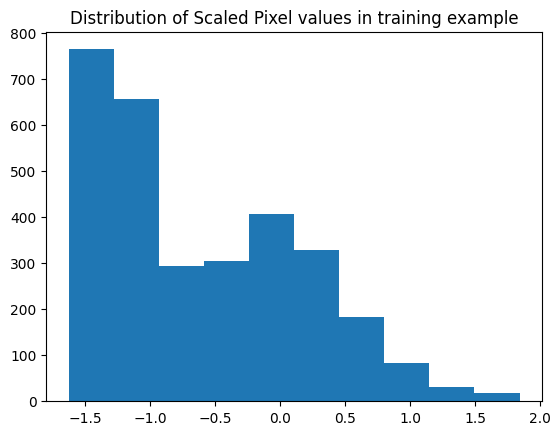

In [12]:
from matplotlib import pyplot as plt
plt.hist(X_train_scaled[0])
plt.title("Distribution of Scaled Pixel values in training example")
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


def build_model(input_dim = 784, output_dim=10, n_hidden_layers = 2, n_neurons = 100):
   model = Sequential() # create Sequential model
   ## (1) define input layer
   model.add(Dense(512, input_shape=(input_dim,), activation='relu'))

   ## (2) define hidden layers
   for i in range(n_hidden_layers):
       model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

   ## (3) define output layer
   model.add(Dense(output_dim, activation = 'softmax')) # the output must be softmax for multi-class classifcation
   return model

model = build_model(input_dim = 3072, output_dim=10, n_hidden_layers = 2, n_neurons = 100)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

## print out model summary
print(model.summary())

## Here we start with training model without feature scaling
train_history = model.fit(X_train_flatten, y_train, validation_data=(X_val_flatten, y_val), batch_size=128, epochs = 20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,635,786 (6.24 MB)

 Trainable params: 1,635,786 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1462 - loss: 104.3699 - val_accuracy: 0.2092 - val_loss: 4.6347
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2173 - loss: 4.7538 - val_accuracy: 0.2577 - val_loss: 2.6121
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2286 - loss: 3.7530 - val_accuracy: 0.3057 - val_loss: 2.1487
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2814 - loss: 2.4486 - val_accuracy: 0.3164 - val_loss: 2.0736
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3024 - loss: 2.1971 - val_accuracy: 0.2747 - val_loss: 2.1566
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3204 - loss: 2.0507 - val_accuracy: 0.2931 - val_loss: 2.4798
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2962 - loss: 2.2031 - val_accuracy: 0.3395 - val_loss: 1.8959
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3465 - loss: 1.9226 - val_accur

In [14]:
# Step 7.1:  Access the model training history
print(train_history.history.keys())
print(train_history.history['loss'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[41.73337936401367, 4.255257606506348, 3.1299314498901367, 2.4400107860565186, 2.1939306259155273, 2.0113918781280518, 2.010315179824829, 1.9046698808670044, 1.8662253618240356, 1.8433786630630493, 1.7976136207580566, 1.7777255773544312, 1.733216643333435, 1.7005903720855713, 1.692183017730713, 1.661871314048767, 1.6422208547592163, 1.6477668285369873, 1.6622859239578247, 1.6352026462554932]


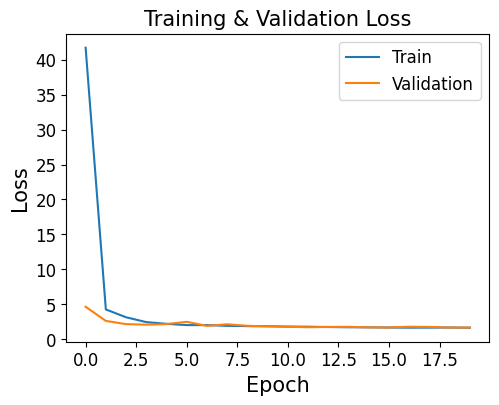

In [15]:
# Step 7.2:  Plot the learning curves for training/validation
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

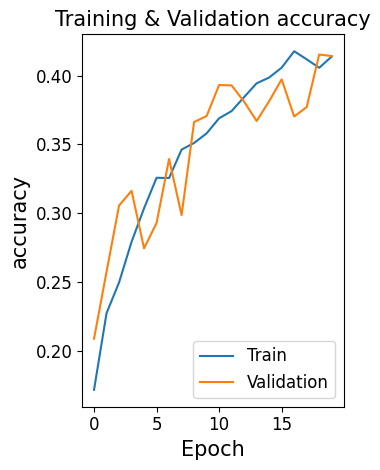

In [16]:
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
# Step 8:  Let's check the predicted labels of training data using the trained model
train_predicted_labels = model.predict(X_train_scaled[0:5,:]) # here we only predict the labels of first 5 images
print("Shape: ",train_predicted_labels.shape)
print(train_predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Shape:  (5, 10)
[[2.62805611e-01 5.63279450e-01 7.02211173e-06 2.89390591e-05
  1.21694822e-02 7.33142369e-05 8.06125626e-02 7.06362491e-03
  1.61124824e-03 7.23486766e-02]
 [7.10996762e-02 3.00285816e-01 1.68646388e-02 2.74692029e-02
  1.25457808e-01 1.47401495e-02 1.28044024e-01 7.45838434e-02
  3.38903666e-02 2.07564473e-01]
 [4.36688811e-02 8.64221752e-02 1.14482746e-01 1.14107907e-01
  1.47476807e-01 8.89429152e-02 1.69705465e-01 9.30538476e-02
  5.73878810e-02 8.47514421e-02]
 [7.02085197e-02 4.49210435e-01 1.28846965e-03 6.61263848e-03
  1.35822324e-02 7.68683245e-03 3.55549812e-01 4.34348695e-02
  8.83506145e-03 4.35911007e-02]
 [1.68714434e-01 1.28810614e-01 5.00767231e-02 5.30300774e-02
  9.05642956e-02 3.29619348e-02 9.06626508e-02 1.81746677e-01
  5.78227229e-02 1.45609900e-01]]


In [18]:
import numpy as np
np.argmax(train_predicted_labels,axis=1) # find the index of column which has maximum value in each row

array([1, 1, 6, 1, 7])

In [10]:
# Step 9:  Evaluate the classification performance
from sklearn.metrics import accuracy_score

In [7]:
def evaluate_model(model,train_data,val_data,test_data):
   X_train,y_train = train_data
   X_val,y_val = val_data
   X_test,y_test = test_data
    # (1) make a prediction on training set to get probablities for all classes, select the class that has maximum probablity
   y_train_pred = np.argmax(model.predict(X_train), axis=-1)
   # (2) calculate the training classification error
   Train_error_s = 1 - accuracy_score(y_train, y_train_pred)
    # (3) make a prediction on validation set
   y_val_pred = np.argmax(model.predict(X_val), axis=-1)
    # (4) calculate the validation classification error
   Val_error_s = 1 - accuracy_score(y_val, y_val_pred)
   # (5) make a prediction on test set
   y_test_pred = np.argmax(model.predict(X_test), axis=-1)
    # (6) calculate the test classification error
   Test_error_s = 1 - accuracy_score(y_test, y_test_pred)
    # (7) reporting results
   print("Train error: ", Train_error_s)
   print("Validation error: ", Val_error_s)
   print("Test error: ", Test_error_s)
   return Train_error_s,Val_error_s,Test_error_s

In [21]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_scaled,y_train),(X_val_scaled,y_val),(X_test_scaled,y_test))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train error:  0.90785
Validation error:  0.9149
Test error:  0.9117


In [16]:
# Step 10: Implement a function for visualizing the improvements over attempts
def visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test):
   import matplotlib.pyplot as plt
   plt.figure(figsize=(12,4))

   # Plot training error values
   plt.subplot(1,3,1)
   plt.plot(improvement_log_train, label='Train', marker='x', linestyle='-', color='b' )
   # Add text labels for each point
   for i, score in enumerate(improvement_log_train):
       plt.text(i, score+0.01, str(round(score,3)), ha='center', va='bottom', fontsize=12)
   plt.title('Training error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Practice Strategies', fontsize=15)
   plt.xticks(range(len(improvement_log_train)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.xlim(-1,len(improvement_log_train))
   plt.ylim(0,1)
   plt.legend(loc='upper right', fontsize=12)

   # Plot Validation error values
   plt.subplot(1,3,2)
   plt.plot(improvement_log_val, label='Validation', marker='x', linestyle='-', color='b' )
   # Add text labels for each point
   for i, score in enumerate(improvement_log_val):
       plt.text(i, score+0.01, str(round(score,3)), ha='center', va='bottom', fontsize=12)
   plt.title('Validation error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Practice Strategies', fontsize=15)
   plt.xticks(range(len(improvement_log_val)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.xlim(-1,len(improvement_log_val))
   plt.ylim(0,1)
   plt.legend(loc='upper right', fontsize=12)

   # Plot testing error values
   plt.subplot(1,3,3)
   plt.plot(improvement_log_test, label='Test', marker='x', linestyle='-', color='b' )
   # Add text labels for each point
   for i, score in enumerate(improvement_log_test):
      plt.text(i, score+0.01, str(round(score,3)), ha='center', va='bottom', fontsize=12)
   plt.title('Test error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Practice Strategies', fontsize=15)
   plt.xticks(range(len(improvement_log_test)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.xlim(-1,len(improvement_log_test))
   plt.ylim(0,1)
   plt.legend(loc='upper right', fontsize=12)
   plt.tight_layout()
   plt.show()

In [18]:
improvement_log_train = []
improvement_log_val = []
improvement_log_test = []

In [24]:
from tensorflow.keras.models import load_model
# Step 11.1: save model to local file
model.save("CIFAR10_model_simple.h5")

# Step 11.2: reload model from the local file
model_loaded = load_model("CIFAR10_model_simple.h5")

# Step 11.3: you are supposed to see same performance as previous one
y_test_pred = np.argmax(model_loaded.predict(X_test_scaled), axis=-1)
Test_error_s = 1 - accuracy_score(y_test, y_test_pred)

print("Test results: ",Test_error_s)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test results:  0.9117


In [25]:
# Step 12.1: first attempt: start with feature normalization and check results
model_scaled = build_model(input_dim = 3072, output_dim=10, n_hidden_layers = 1, n_neurons = 1000)
model_scaled.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
print(model_scaled.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1000)                │         513,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,096,386 (8.00 MB)

 Trainable params: 2,096,386 (8.00 MB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
# Step 12.2: Training the model on the scaled data
train_history = model_scaled.fit(X_train_scaled,y_train, validation_data=(X_val_scaled,y_val), batch_size=128, epochs = 10) # Make sure using scaled training and scaled validation.

# Step 12.3: Evaluate this model again to see any improvements
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model_scaled,(X_train_scaled,y_train),(X_val_scaled,y_val),(X_test_scaled,y_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3535 - loss: 1.9376 - val_accuracy: 0.4592 - val_loss: 1.5459
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4872 - loss: 1.4548 - val_accuracy: 0.4721 - val_loss: 1.5017
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5277 - loss: 1.3328 - val_accuracy: 0.4944 - val_loss: 1.4486
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5711 - loss: 1.2152 - val_accuracy: 0.4972 - val_loss: 1.4587
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5977 - loss: 1.1312 - val_accuracy: 0.4929 - val_loss: 1.4666
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6274 - loss: 1.0555 - val_accuracy: 0.5150 - val_loss: 1.4711
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6594 - loss: 0.9724 - val_accuracy: 0.5183 - val_loss: 1.4807
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6824 - loss: 0.8930 - val_accuracy: 0.

In [27]:
# Step 12.4: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

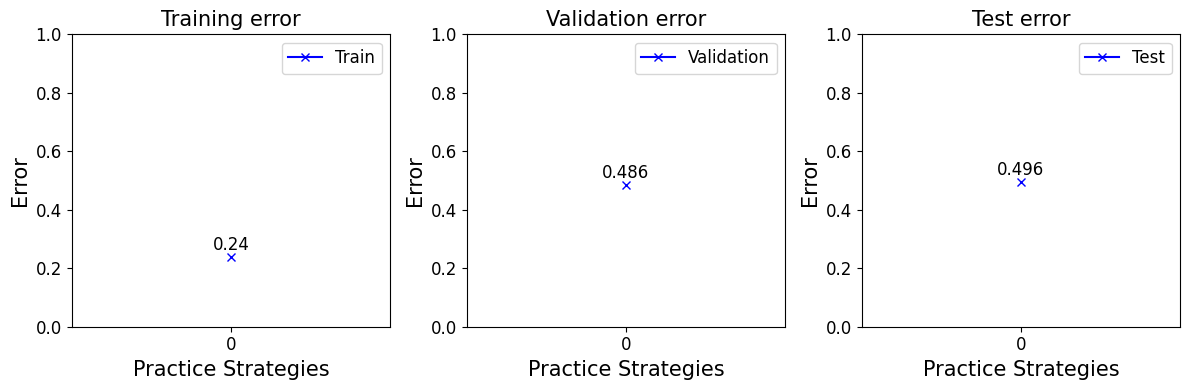

In [28]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


In [29]:
# Step 13.1: let's increase the number of layers in model definition
model_5layers = build_model(input_dim = 3072, output_dim=10, n_hidden_layers = 3, n_neurons = 1000)
model_5layers.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
print(model_5layers.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1000)                │         513,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,098,386 (15.63 MB)

 Trainable params: 4,098,386 (15.63 MB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
# Step 13.2: Let's start retraining the model using normalized features
train_history = model_5layers.fit(X_train_scaled,y_train, validation_data=(X_val_scaled,y_val), batch_size=128, epochs = 20)
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model_5layers,(X_train_scaled,y_train),(X_val_scaled,y_val),(X_test_scaled,y_test))


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3385 - loss: 1.8808 - val_accuracy: 0.4285 - val_loss: 1.5930
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4750 - loss: 1.4888 - val_accuracy: 0.4684 - val_loss: 1.5208
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5151 - loss: 1.3625 - val_accuracy: 0.4885 - val_loss: 1.4613
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5512 - loss: 1.2651 - val_accuracy: 0.5129 - val_loss: 1.4035
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5886 - loss: 1.1545 - val_accuracy: 0.5184 - val_loss: 1.4232
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6189 - loss: 1.0538 - val_accuracy: 0.5109 - val_loss: 1.4241
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6472 - loss: 0.9810 - val_accuracy: 0.5252 - val_loss: 1.4478
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6811 - loss: 0.8918 - val_accuracy: 0

In [31]:
# Step 13.4: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

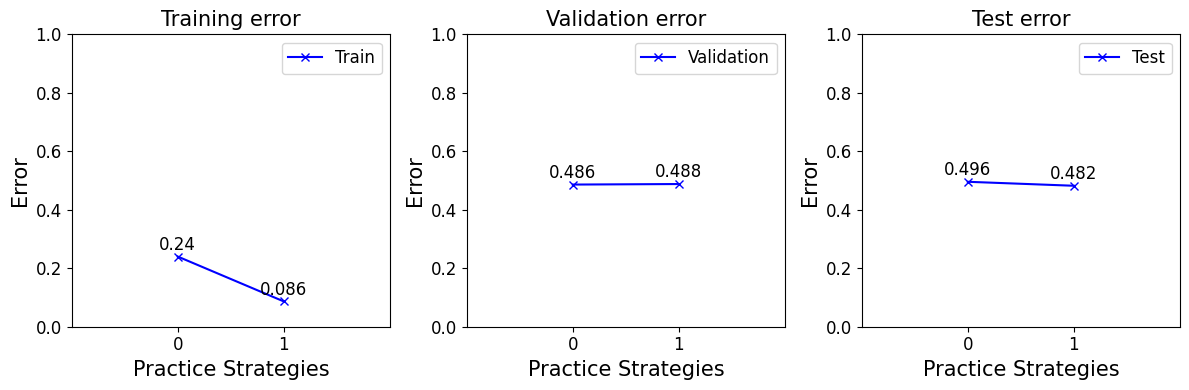

In [32]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [33]:
# Step 14.1: forth attempt: increase the epochs during training, let's use the same architecture in Step 17
model_5layers_50epochs = build_model(input_dim = 3072, output_dim=10, n_hidden_layers = 3, n_neurons = 1000)
model_5layers_50epochs.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
print(model_5layers_50epochs.summary())

# Step 14.2: Let's start retraining the model with epochs = 50
train_history = model_5layers_50epochs.fit(X_train_scaled,y_train, validation_data=(X_val_scaled,y_val), batch_size=128, epochs = 50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1000)                │         513,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,098,386 (15.63 MB)

 Trainable params: 4,098,386 (15.63 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3436 - loss: 1.8632 - val_accuracy: 0.4462 - val_loss: 1.5748
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4709 - loss: 1.4984 - val_accuracy: 0.4848 - val_loss: 1.4771
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5094 - loss: 1.3570 - val_accuracy: 0.4886 - val_loss: 1.4550
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5471 - loss: 1.2539 - val_accuracy: 0.5036 - val_loss: 1.4435
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5859 - loss: 1.1548 - val_accuracy: 0.5124 - val_loss: 1.4308
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6172 - loss: 1.0688 - val_accuracy: 0.5225 - val_loss: 1.4154
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6431 - loss: 0.9897 - val_accuracy: 0.5252 - val_loss: 1.4503
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6768 - loss: 0.8921 - val_accurac

In [34]:
# Step 14.3: let's evaluate the model again, I expected to see worse validation results due to overfitting
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model_5layers_50epochs,(X_train_scaled,y_train),(X_val_scaled,y_val),(X_test_scaled,y_test))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train error:  0.03634999999999999
Validation error:  0.4779
Test error:  0.47809999999999997


In [35]:
# Step 14.4: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

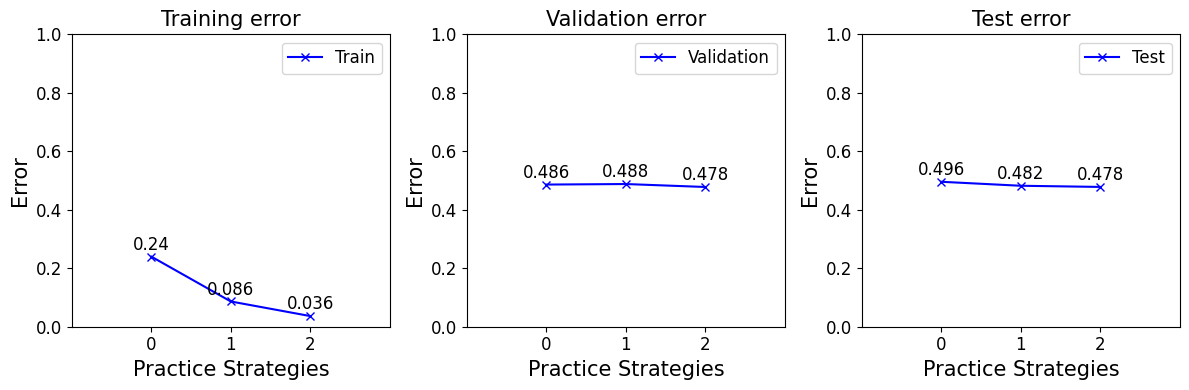

In [36]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

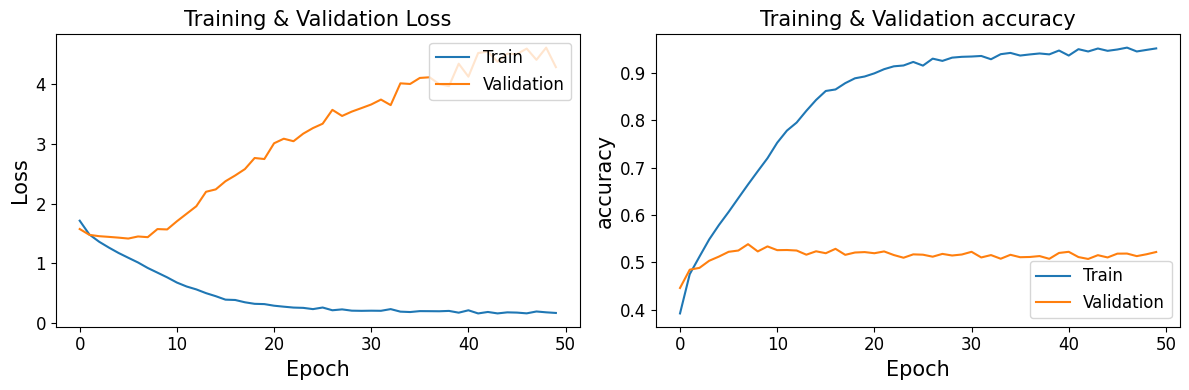

In [37]:
# Step 15: Visualize the learning curves during training to diagnose the overfitting
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Step 15.1: Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Step 15.2: Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
## Step 16.1: define a new function by adding a dropout layer to avoid overfitting

def build_model_dropout(input_dim = 784, output_dim=10, n_hidden_layers = 2, n_neurons = 1000):
   from tensorflow.keras.layers import Dropout
   model = Sequential() # create Sequential model
   ## (1) define input layer
   model.add(Dense(512, input_shape=(input_dim,), activation='relu'))

   ## (2) define hidden layers
   for i in range(n_hidden_layers):
       model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions
       # add a dropout layer for regularization
       model.add(Dropout(0.2))

   ## (3) define output layer
   model.add(Dense(output_dim, activation = 'softmax')) # the output must be softmax for multi-class classifcation
   return model

In [39]:
# Step 16.2: let's use the same architecture in Step 15
model_dropout = build_model_dropout(input_dim = 3072, output_dim=10, n_hidden_layers = 3, n_neurons = 1000)
model_dropout.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
print(model_dropout.summary())

# Step 16.3: Let's start retraining the model with epochs = 30
train_history = model_dropout.fit(X_train_scaled,y_train, validation_data=(X_val_scaled,y_val), batch_size=128, epochs = 30)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1000)                │         513,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,098,386 (15.63 MB)

 Trainable params: 4,098,386 (15.63 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3195 - loss: 1.9138 - val_accuracy: 0.4009 - val_loss: 1.6644
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4347 - loss: 1.5923 - val_accuracy: 0.4649 - val_loss: 1.5097
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4804 - loss: 1.4696 - val_accuracy: 0.4840 - val_loss: 1.4815
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5014 - loss: 1.4135 - val_accuracy: 0.4573 - val_loss: 1.5133
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5175 - loss: 1.3581 - val_accuracy: 0.5099 - val_loss: 1.4199
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5434 - loss: 1.2783 - val_accuracy: 0.4877 - val_loss: 1.4382
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5519 - loss: 1.2517 - val_accuracy: 0.5140 - val_loss: 1.4283
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5762 - loss: 1.1894 - val_accura

In [40]:
# Step 16.4: let's evaluate the model again, I expected to see better validation results as we use regularizations
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model_dropout,(X_train_scaled,y_train),(X_val_scaled,y_val),(X_test_scaled,y_test))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train error:  0.133475
Validation error:  0.4596
Test error:  0.4579


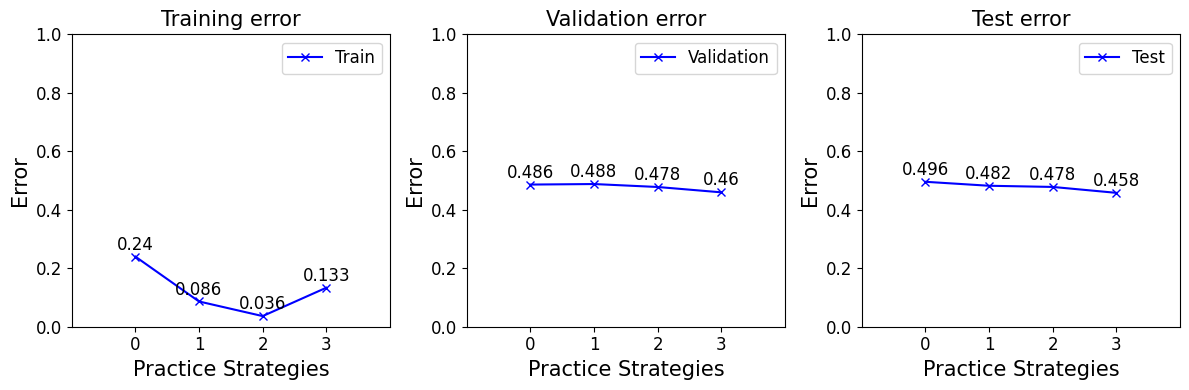

In [41]:
# Step 16.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [42]:
# Step 17.1: Define a new function by adding normalization layer
def build_model_dropout_BN(input_dim = 784, output_dim=10, n_hidden_layers = 2, n_neurons = 1000):
   from tensorflow.keras.layers import Dropout
   from keras.layers import BatchNormalization
   model = Sequential() # create Sequential model
   ## (1) define input layer
   model.add(Dense(512, input_shape=(input_dim,), activation='relu'))

   ## (2) define hidden layers
   for i in range(n_hidden_layers):
       model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions
       model.add(BatchNormalization()) # add normalization here

       # add a dropout layer for regularization
       model.add(Dropout(0.2))

   ## (3) define output layer
   model.add(Dense(output_dim, activation = 'softmax')) # the output must be softmax for multi-class classifcation
   return model

In [43]:
# Step 17.2: retraining the model with same settings
model_dropout_BN = build_model_dropout_BN(input_dim = 3072, output_dim=10, n_hidden_layers = 3, n_neurons = 1000)
model_dropout_BN.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
print(model_dropout_BN.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1000)                │         513,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,110,386 (15.68 MB)

 Trainable params: 4,104,386 (15.66 MB)

 Non-trainable params: 6,000 (23.44 KB)

None


In [44]:
# Step 17.3: Let's start retraining the model with epochs = 30
train_history = model_dropout_BN.fit(X_train_scaled,y_train, validation_data=(X_val_scaled,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2947 - loss: 2.2279 - val_accuracy: 0.4185 - val_loss: 1.6238
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4344 - loss: 1.6060 - val_accuracy: 0.4784 - val_loss: 1.4839
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4932 - loss: 1.4344 - val_accuracy: 0.4994 - val_loss: 1.4262
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5377 - loss: 1.3173 - val_accuracy: 0.4987 - val_loss: 1.4532
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5600 - loss: 1.2470 - val_accuracy: 0.5275 - val_loss: 1.3544
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5830 - loss: 1.1786 - val_accuracy: 0.5224 - val_loss: 1.4210
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6059 - loss: 1.1122 - val_accuracy: 0.5283 - val_loss: 1.3729
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6226 - loss: 1.0477 - val_accuracy: 

In [45]:
# Step 17.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model_dropout_BN,(X_train_scaled,y_train),(X_val_scaled,y_val),(X_test_scaled,y_test))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train error:  0.04937499999999995
Validation error:  0.4514
Test error:  0.4468


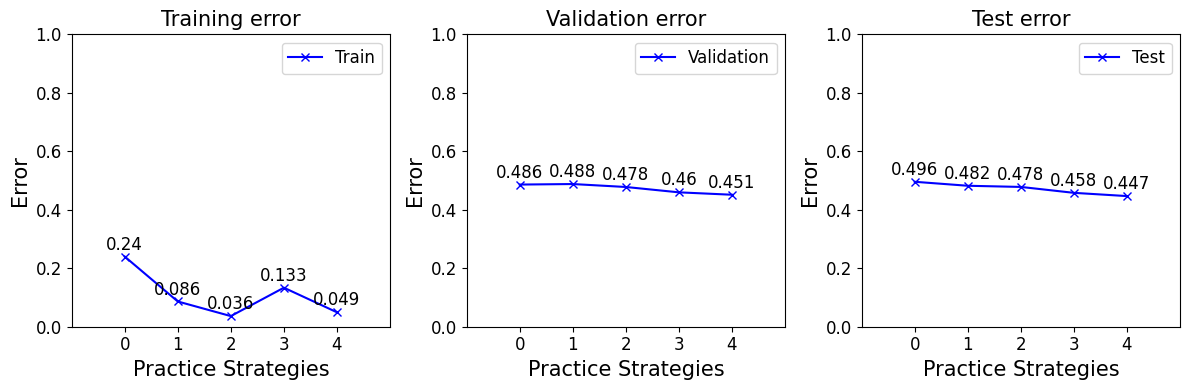

In [46]:
# Step 17.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [47]:
# Step 18.1: Add early stop into model training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]

In [48]:
# Step 18.2: retraining the model with same settings
model_dropout_BN_earlystop = build_model_dropout_BN(input_dim = 3072, output_dim=10, n_hidden_layers = 3, n_neurons = 1000)
model_dropout_BN_earlystop.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
print(model_dropout_BN_earlystop.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1000)                │         513,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,110,386 (15.68 MB)

 Trainable params: 4,104,386 (15.66 MB)

 Non-trainable params: 6,000 (23.44 KB)

None


In [49]:
# Step 18.3: Let's start retraining the model with epochs = 30
train_history = model_dropout_BN_earlystop.fit(X_train_scaled,y_train, validation_data=(X_val_scaled,y_val), batch_size=128, epochs = 50, callbacks=keras_callbacks) # add callbacks here

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2983 - loss: 2.2292

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2985 - loss: 2.2283 - val_accuracy: 0.4131 - val_loss: 1.6447
Epoch 2/50
303/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4341 - loss: 1.5997

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4345 - loss: 1.5989 - val_accuracy: 0.4612 - val_loss: 1.5579
Epoch 3/50
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4898 - loss: 1.4326

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4898 - loss: 1.4325 - val_accuracy: 0.5015 - val_loss: 1.4218
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5361 - loss: 1.3136 - val_accuracy: 0.5005 - val_loss: 1.4262
Epoch 5/50
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5535 - loss: 1.2561

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5535 - loss: 1.2562 - val_accuracy: 0.5201 - val_loss: 1.3749
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5799 - loss: 1.1853 - val_accuracy: 0.5297 - val_loss: 1.3758
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6063 - loss: 1.1165 - val_accuracy: 0.5262 - val_loss: 1.4094
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6242 - loss: 1.0594 - val_accuracy: 0.5357 - val_loss: 1.3881
Epoch 9/50
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6387 - loss: 1.0153

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6385 - loss: 1.0158 - val_accuracy: 0.5436 - val_loss: 1.3478
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6586 - loss: 0.9559 - val_accuracy: 0.5405 - val_loss: 1.3788
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6752 - loss: 0.9138 - val_accuracy: 0.5388 - val_loss: 1.4226
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6965 - loss: 0.8502 - val_accuracy: 0.5474 - val_loss: 1.3677
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7129 - loss: 0.8020 - val_accuracy: 0.5496 - val_loss: 1.3876
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7277 - loss: 0.7646 - val_accuracy: 0.5345 - val_loss: 1.4649
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7426 - loss: 0.7112 - val_accuracy: 0.5461 - val_loss: 1.4943
Epoch 16/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7618 - loss: 0.6611 - val_accuracy: 0.5406

In [50]:
# Step 18.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model_dropout_BN_earlystop,(X_train_scaled,y_train),(X_val_scaled,y_val),(X_test_scaled,y_test))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train error:  0.13865000000000005
Validation error:  0.4537
Test error:  0.45530000000000004


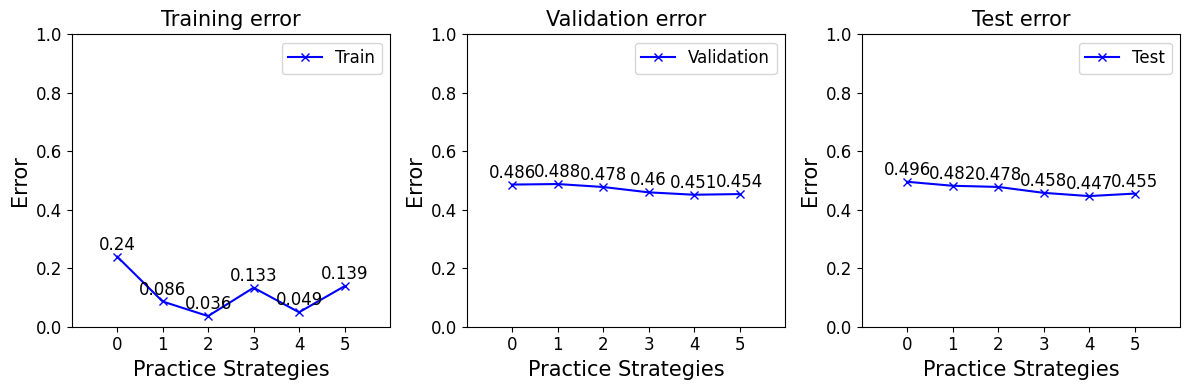

In [51]:
# Step 18.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [1]:
## Step 20.1: Load the dataset, and get training, validation and test set
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_data, y_data), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_data,y_data, test_size=0.2, random_state=42)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [2]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 1)
X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
# Step 20.2: Scale the pixels into range (0,1)

X_train_scaled = X_train/255
X_val_scaled = X_val/255
X_test_scaled = X_test/255

print("X_train_scaled.shape: ",X_train_scaled.shape)
print("X_val_scaled.shape: ",X_val_scaled.shape)
print("X_test_scaled.shape: ",X_test_scaled.shape)

X_train_scaled.shape:  (40000, 32, 32, 3)
X_val_scaled.shape:  (10000, 32, 32, 3)
X_test_scaled.shape:  (10000, 32, 32, 3)


In [4]:
# Step 20.3: Define convolutional neural network

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

CNN_model = Sequential() # create Sequential model

# first convolutional block
CNN_model.add(Conv2D(32, (3,3), input_shape=(32,32,3), padding='same', activation = 'relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.2))

# second convolutional block
CNN_model.add(Conv2D(64, (3,3), padding='same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.2))

# third convolutional block
CNN_model.add(Conv2D(128, (3,3), padding='same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())
CNN_model.add(Dense(10, activation = 'softmax'))

CNN_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

print(CNN_model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,634 (447.79 KB)

 Trainable params: 114,186 (446.04 KB)

 Non-trainable params: 448 (1.75 KB)

None


In [5]:
# Step 20.4: Start model training
history = CNN_model.fit(X_train_scaled,y_train, validation_data=(X_val_scaled,y_val), batch_size=64, epochs = 20)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3799 - loss: 1.9152 - val_accuracy: 0.4778 - val_loss: 1.5769
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5596 - loss: 1.2788 - val_accuracy: 0.5285 - val_loss: 1.3920
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6184 - loss: 1.1046 - val_accuracy: 0.6379 - val_loss: 1.0472
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6500 - loss: 1.0135 - val_accuracy: 0.6321 - val_loss: 1.0533
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6683 - loss: 0.9429 - val_accuracy: 0.6671 - val_loss: 0.9746
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6899 - loss: 0.9044 - val_accuracy: 0.7009 - val_loss: 0.8782
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6997 - loss: 0.8698 - val_accuracy: 0.6520 - val_loss: 1.0006
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7165 - loss: 0.8237 - val_accuracy: 0

In [11]:
# Step 20.5: Let's evaluate model and visualize the improvements again
import numpy as np

Train_error_s,Val_error_s,Test_error_s = evaluate_model(CNN_model,(X_train_scaled,y_train),(X_val_scaled,y_val),(X_test_scaled,y_test))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train error:  0.16325
Validation error:  0.2772
Test error:  0.278


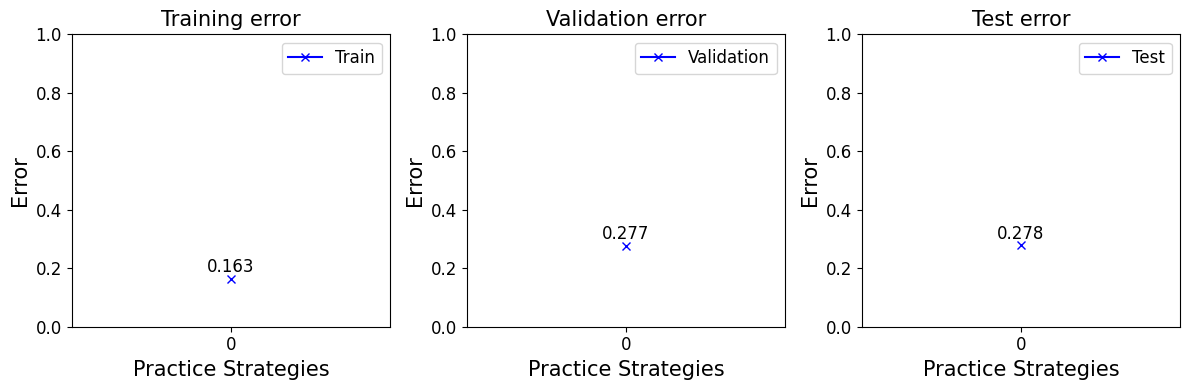

In [19]:
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

# **Question 22:**

## **Problem:** Compare different deep learning architectures for image classification

## **Task:** Pick at least five different types of architectures in the list for image classification, and compare the accuracy to the standard neural network and convolutional neural network

In [20]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(X_data, y_data), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_data,y_data, test_size=0.2, random_state=42)


In [21]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 1)
X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:

X_train_scaled = X_train/255
X_val_scaled = X_val/255
X_test_scaled = X_test/255

print("X_train_scaled.shape: ",X_train_scaled.shape)
print("X_val_scaled.shape: ",X_val_scaled.shape)
print("X_test_scaled.shape: ",X_test_scaled.shape)

In [13]:
#@title VGG19 Model

import keras
import numpy as np
import tensorflow as tf
from tensorflow.image import resize
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [14]:
# Define a function to dynamically resize images to 224x224
def data_generator(X, y, batch_size=32):
    while True:
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]

            # Resize images
            batch_X_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in batch_X], dtype=np.float32)

            # Yield batch of resized images and labels
            yield batch_X_resized, batch_y

train_gen = data_generator(X_train_scaled, y_train, batch_size=32)
val_gen = data_generator(X_val_scaled, y_val, batch_size=32)
test_gen = data_generator(X_test_scaled, y_test, batch_size=32)

In [15]:
# define the architecture for the vgg19 model
vgg19_base = VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling="max",
    name="vgg19"
)

vgg19_base.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [22]:
vgg19_base.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    vgg19_base,
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 512)                 │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,158,282 (76.90 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [27]:
# Train the model using the generator
steps_per_epoch = len(X_train_scaled) // 32
validation_steps = len(X_val_scaled) // 32

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=4,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 361s 289ms/step - accuracy: 0.2982 - loss: 1.8244 - val_accuracy: 0.3381 - val_loss: 1.6956
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 358s 287ms/step - accuracy: 0.2973 - loss: 1.8257 - val_accuracy: 0.3587 - val_loss: 1.6490
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 359s 288ms/step - accuracy: 0.2995 - loss: 1.8177 - val_accuracy: 0.3267 - val_loss: 1.6972
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 357s 285ms/step - accuracy: 0.3019 - loss: 1.8086 - val_accuracy: 0.3536 - val_loss: 1.6673


In [ ]:
# Visualize the learning curves during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# modify the evaluate_model function to accept data generators as input

import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score

def evaluate_model(model, train_gen, val_gen, test_gen, steps_per_epoch_train, steps_per_epoch_val, steps_per_epoch_test):
    def predict_from_generator(generator, steps):
        y_true = []
        y_pred = []

        for _ in range(steps):
            batch_X, batch_y = next(generator)
            batch_preds = np.argmax(model.predict(batch_X, verbose=0), axis=-1)
            y_true.extend(batch_y)
            y_pred.extend(batch_preds)

        return np.array(y_true), np.array(y_pred)

    # Make predictions and compute errors
    y_train, y_train_pred = predict_from_generator(train_gen, steps_per_epoch_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)

    y_val, y_val_pred = predict_from_generator(val_gen, steps_per_epoch_val)
    val_error = 1 - accuracy_score(y_val, y_val_pred)

    y_test, y_test_pred = predict_from_generator(test_gen, steps_per_epoch_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Print out results
    print("Train error:", train_error)
    print("Validation error:", val_error)
    print("Test error:", test_error)

    return train_error, val_error, test_error

In [29]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,train_gen,val_gen,test_gen, 1250, 312, 312)

Train error: 0.6306
Validation error: 0.6472712680577849
Test error: 0.6431290064102564


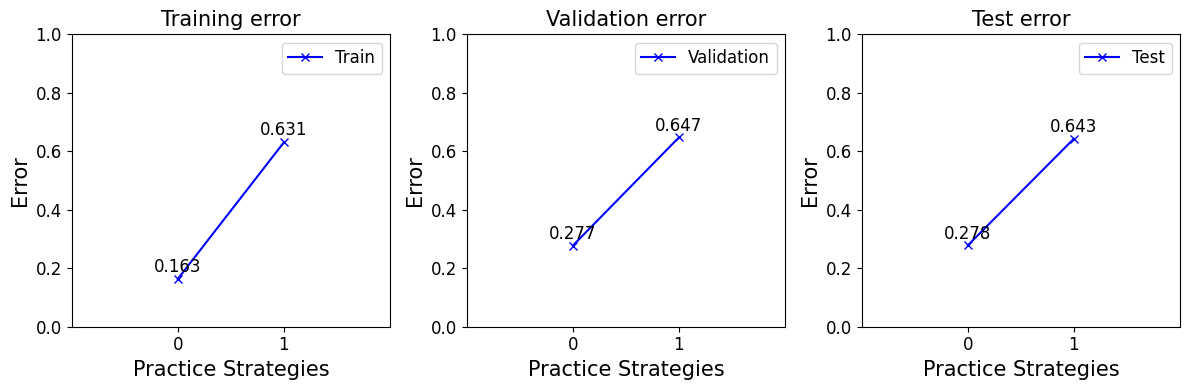

In [30]:
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [31]:
#@title ResNet50V2 model

import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

def data_generator(X, y, batch_size=32):
    while True:  # Infinite loop for generator
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]

            # Resize images
            batch_X_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in batch_X], dtype=np.float32)

            # Apply ResNet50V2 preprocessing
            batch_X_resized = tf.keras.applications.resnet_v2.preprocess_input(batch_X_resized)

            yield batch_X_resized, batch_y

# Create generators
train_generator = data_generator(X_train_scaled, y_train, batch_size=32)
val_generator = data_generator(X_val_scaled, y_val, batch_size=32)
test_generator = data_generator(X_test_scaled, y_test, batch_size=32)

# Load ResNet50V2 with correct input shape (224x224)
resnet_base = ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

# Freeze the convolutional base
resnet_base.trainable = False

# Define the ResNet50V2-based model
model = Sequential([
    resnet_base,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")  # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,950,666 (285.91 MB)

 Trainable params: 51,385,866 (196.02 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [32]:
# Train the model using the generator
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=4,
    steps_per_epoch=1250,
    validation_steps=1250
)

Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 274s 208ms/step - accuracy: 0.1005 - loss: 8.2005 - val_accuracy: 0.0993 - val_loss: 2.3047
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 247s 198ms/step - accuracy: 0.0956 - loss: 2.3312 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 248s 198ms/step - accuracy: 0.0963 - loss: 2.3039 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 249s 199ms/step - accuracy: 0.0989 - loss: 2.3040 - val_accuracy: 0.0994 - val_loss: 2.3038


In [ ]:
# Visualize the learning curves during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,train_generator,val_generator,test_generator, 1250, 312, 312)

Train error: 0.89985
Validation error: 0.9006821829855538
Test error: 0.9001402243589743


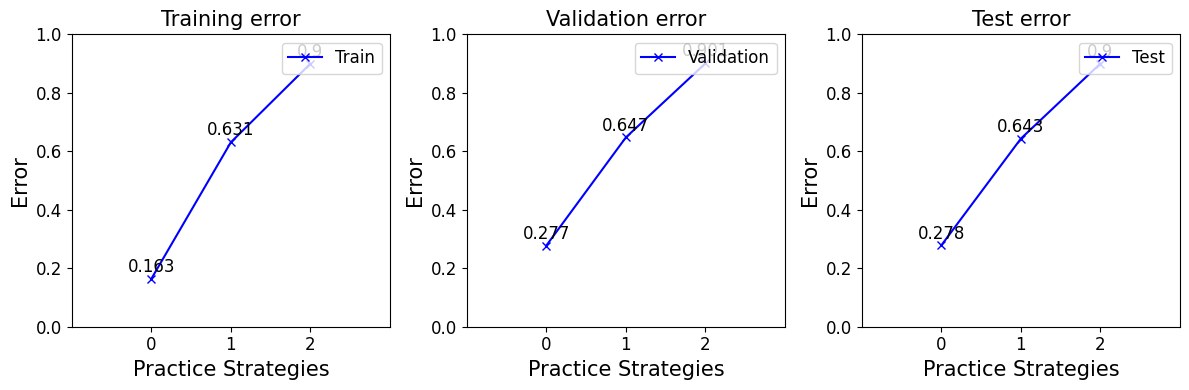

In [34]:
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [35]:
#@title InceptionV3 Model

import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



# Custom generator function to resize images on-the-fly
def data_generator(X, y, batch_size=32):
    while True:  # Infinite loop for generator
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]

            # Resize images dynamically
            batch_X_resized = np.array([tf.image.resize(img, (299, 299)).numpy() for img in batch_X], dtype=np.float32)

            # Apply InceptionV3 preprocessing
            batch_X_resized = tf.keras.applications.inception_v3.preprocess_input(batch_X_resized)

            yield batch_X_resized, batch_y

# Create generators
train_generator = data_generator(X_train_scaled, y_train, batch_size=32)
val_generator = data_generator(X_val_scaled, y_val, batch_size=32)
test_generator = data_generator(X_test_scaled, y_test, batch_size=32)

# Train the model using the custom generator
steps_per_epoch = len(X_train_scaled) // 32
validation_steps = len(X_val_scaled) // 32

# Load InceptionV3 with correct input shape (299,299)
inception_base = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(299, 299, 3)
)

# Freeze the convolutional base
inception_base.trainable = False

# Define the InceptionV3-based model
model = Sequential([
    inception_base,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")  # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,360,042 (211.18 MB)

 Trainable params: 33,557,258 (128.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [36]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=4,
    steps_per_epoch=1250,
    validation_steps=1250
)

Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 449s 345ms/step - accuracy: 0.1000 - loss: 11.3088 - val_accuracy: 0.0993 - val_loss: 2.3037
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 422s 337ms/step - accuracy: 0.0959 - loss: 2.3039 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 412s 330ms/step - accuracy: 0.0992 - loss: 2.3040 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 421s 337ms/step - accuracy: 0.0990 - loss: 2.3040 - val_accuracy: 0.0994 - val_loss: 2.3038


In [ ]:
# Visualize the learning curves during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [37]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,train_generator,val_generator,test_generator, 1250, 312, 312)

Train error: 0.89985
Validation error: 0.9006821829855538
Test error: 0.9001402243589743


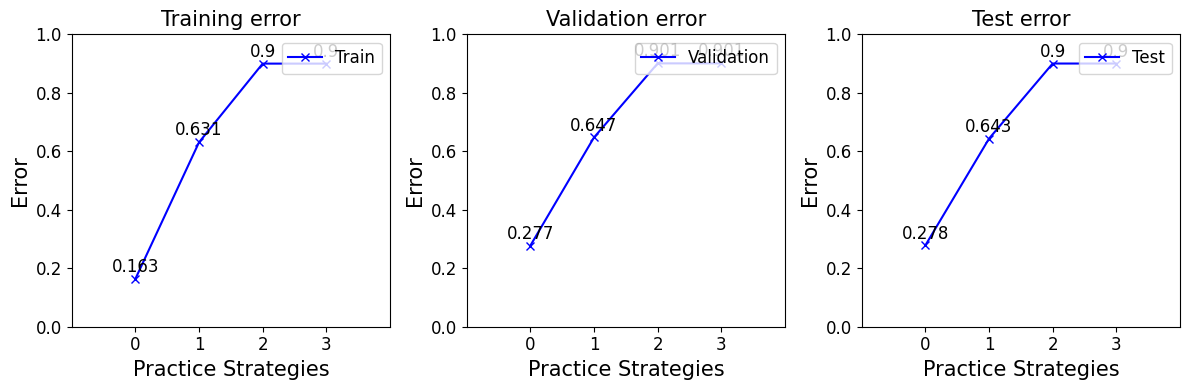

In [38]:
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [39]:
#@title DenseNet201 Model

from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Custom generator function to resize images
def data_generator(X, y, batch_size=32):
    while True:  # Infinite loop for generator
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]

            # Resize images dynamically
            batch_X_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in batch_X], dtype=np.float32)

            # Apply DenseNet201 preprocessing
            batch_X_resized = tf.keras.applications.densenet.preprocess_input(batch_X_resized)

            yield batch_X_resized, batch_y

# Create generators
train_generator = data_generator(X_train_scaled, y_train, batch_size=32)
val_generator = data_generator(X_val_scaled, y_val, batch_size=32)
test_generator = data_generator(X_test_scaled, y_test, batch_size=32)

# Load DenseNet201 with correct input shape (224,224)
densenet_base = DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

# Freeze the convolutional base
densenet_base.trainable = False

# Define the DenseNet201-based model
model = Sequential([
    densenet_base,
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")  # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)             │ (None, 7, 7, 1920)          │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 94080)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │      48,169,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,496,586 (253.66 MB)

 Trainable params: 48,174,602 (183.77 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [40]:
# Train the model using the generator
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=4,
    steps_per_epoch=1250,
    validation_steps=1250
)

Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 450s 325ms/step - accuracy: 0.0984 - loss: 8.1593 - val_accuracy: 0.0993 - val_loss: 2.3036
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 376s 301ms/step - accuracy: 0.0982 - loss: 2.3039 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 379s 304ms/step - accuracy: 0.0990 - loss: 2.3040 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 378s 303ms/step - accuracy: 0.0990 - loss: 2.3040 - val_accuracy: 0.0994 - val_loss: 2.3038


In [ ]:
# Visualize the learning curves during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,train_generator,val_generator,test_generator, 1250, 312, 312)

Train error: 0.89985
Validation error: 0.9006821829855538
Test error: 0.9001402243589743


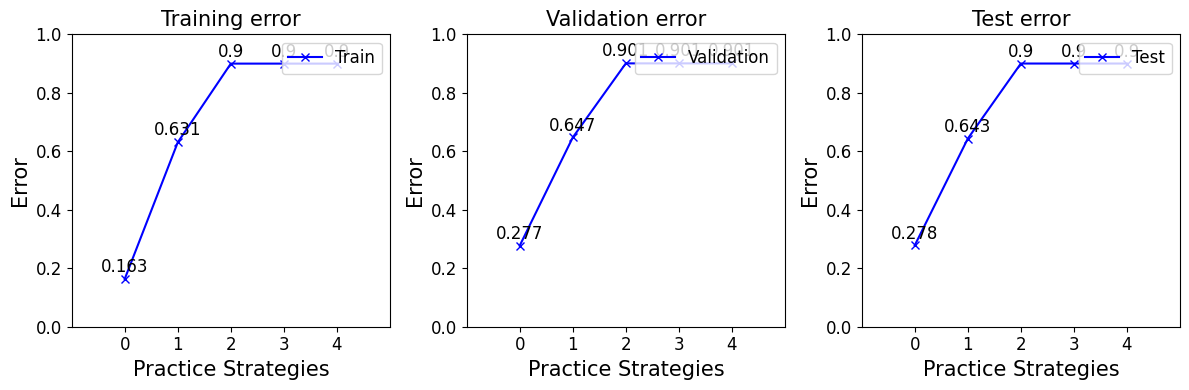

In [42]:
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [43]:
#@title MobileNet Model

import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


# Custom generator function to resize images
def data_generator(X, y, batch_size=32):
    while True:  # Infinite loop for generator
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]

            # Resize images dynamically
            batch_X_resized = np.array([tf.image.resize(img, (224, 224)).numpy() for img in batch_X], dtype=np.float32)

            # Apply DenseNet201 preprocessing
            batch_X_resized = tf.keras.applications.densenet.preprocess_input(batch_X_resized)

            yield batch_X_resized, batch_y

# Create generators
train_generator = data_generator(X_train_scaled, y_train, batch_size=32)
val_generator = data_generator(X_val_scaled, y_val, batch_size=32)

# Load MobileNetV2 with correct input shape (224,224)
mobilenet_base = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

# Freeze the convolutional base
mobilenet_base.trainable = False

# Define the MobileNetV2-based model
model = Sequential([
    mobilenet_base,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")  # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,317,130 (69.87 MB)

 Trainable params: 16,059,146 (61.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [44]:
# Train the model using the generator
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=4,
    steps_per_epoch=1250,
    validation_steps=1250
)

Epoch 1/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 212s 162ms/step - accuracy: 0.0957 - loss: 7.0774 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 162ms/step - accuracy: 0.0961 - loss: 2.3039 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 200s 160ms/step - accuracy: 0.0991 - loss: 2.3040 - val_accuracy: 0.0993 - val_loss: 2.3038
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 163ms/step - accuracy: 0.0990 - loss: 2.3040 - val_accuracy: 0.0994 - val_loss: 2.3038


In [ ]:
# Visualize the learning curves during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [45]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,train_generator,val_generator,test_generator, 1250, 312, 312)

Train error: 0.89985
Validation error: 0.9006821829855538
Test error: 0.8999799357945425


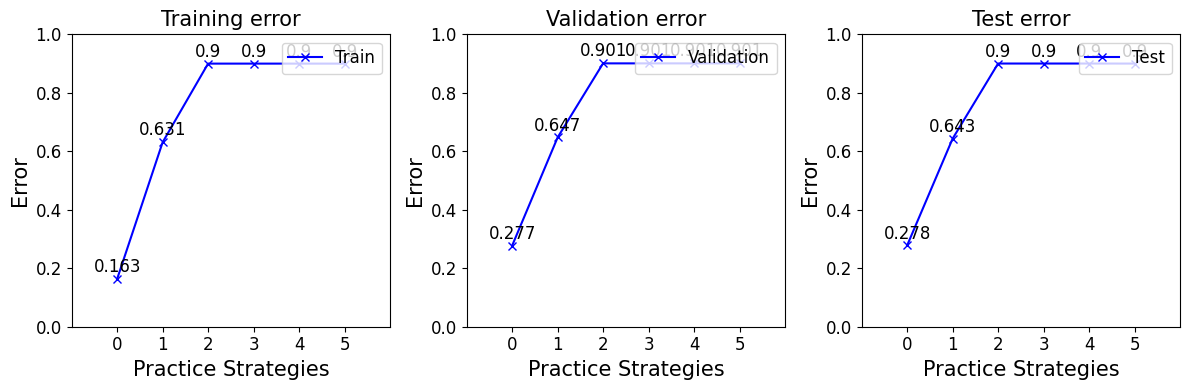

In [46]:
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)